In [155]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
from __future__ import division

### Lineární regrese y=f(x)

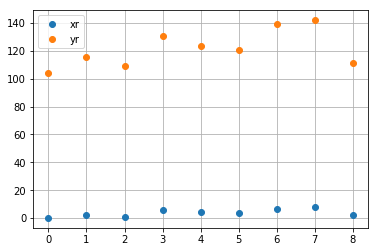

In [156]:
xr=[0.1   , 2.4   ,  0.9  ,  6.0  , 4.0   , 3.7   ,6.8    , 8.2   , 2.2]
yr=[103.8 , 115.3 , 108.9 , 130.7 , 123.5 , 120.3 , 139.1 , 141.9 , 111.3]

xr=array(xr);yr=array(yr)

plot(xr,'o',label="xr")
plot(yr,'o',label="yr");grid()
legend();show()

#### Jak silná je lineární závislost?

1.1  Vykreslení do grafu

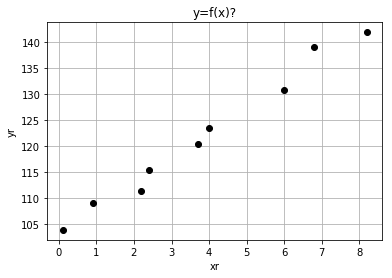

In [158]:
plot(xr,yr,'ok');grid();title("y=f(x)?");
xlabel('xr');ylabel('yr');show()

1.2 Korelační koefficient

In [133]:
meanx=mean(xr)
stdx=std(xr)
meany=mean(yr)
stdy=std(yr)

N=len(xr)

r=1/N*sum((xr-meanx)*(yr-meany))/std(xr)/std(yr)

print "r=",r

print "corrcoef(xr,yr)="
print corrcoef(xr,yr)

r= 0.992155275469
corrcoef(xr,yr)=
[[ 1.          0.99215528]
 [ 0.99215528  1.        ]]


1.3 Koeficient determinace (kolik % je vysvětlitelných lineární závislostí, pozor na přepoklady: N(0,sigma), dostatek dat, aj., prakticky tedy spíše orientační nebo jako relativní ukazatel)

In [134]:
print "r^2=", r**2

r^2= 0.98437209064


<div style="width:100%;height:3px;background-color:green;"> </div>

#### Nalezení $a_0, a_1$ pro $y=a_0+a_1 \cdot x_r=a_0 \cdot g_0+a_1\cdot g_1=[1 \ \ x_r] \cdot \begin{bmatrix} a_0 \\ a_1  \end{bmatrix}=\textbf{x}\cdot\textbf{a}$

Pro tento regresní model

$$\textbf{x}[i]=\begin{bmatrix} g_0 \ g_1\end{bmatrix}=\begin{bmatrix}1 \ x_r[i]\end{bmatrix}  \ \ \  , \ \  \ \textbf{X}=\begin{bmatrix} 1 & x_r[1]\\1 & x_r[2]\\...\\1 & x_r[N]  \end{bmatrix}$$

Regresní model maticově

$$\begin{bmatrix} y[1] \\ y[2] \\...\\y[N]  \end{bmatrix}=\textbf{X}\cdot\begin{bmatrix} a_0 \\ a_1   \end{bmatrix}$$

In [135]:
A=array(((N , sum(xr)),(sum(xr) , sum(xr**2))))

In [136]:
b=array((sum(yr), sum(xr*yr)))

In [137]:
a=dot(linalg.inv(A),b)

In [138]:
print "nalezene regresni parametry a=",a

print "nalezená regresni funkce je y="+str(a[0])+"+"+str(a[1])+"*xr"

print "Skutečná funkce byla y=100+5*x, odlišnost parametrů a je dána chybou měření, šumem,..."

nalezene regresni parametry a= [ 103.16237333    4.84952303]
nalezená regresni funkce je y=103.162373334+4.84952303181*xr
Skutečná funkce byla y=100+5*x, odlišnost parametrů a je dána chybou měření, šumem,...


<div style="width:100%;height:5px;background-color:green;"> </div>


### Polynomiální regrese (také lineární v parametrech)

$$ z=f(x,y)=a_0+a_1\cdot x+a_2\cdot y+a_3\cdot x^2+a_4\cdot x\cdot y+a_5\cdot y^2 =$$

$$ = [1,x,y,x^2,xy,y^2] \cdot \begin{bmatrix}
a_0  \\
a_1 \\
a_2 \\
a_3 \\
a_4 \\
a_5 \\
\end{bmatrix} = \textbf{x}\cdot \textbf{a}$$

Pro tento regresní model

$$\textbf{X}=\begin{bmatrix} 
1 & x_r[1] & y_r[1] & x_r^2[1] & x_r[1] \cdot y_r[1] &  y_r^2[1] \\
1 & x_r[2] & y_r[2] & x_r^2[2] & x_r[2] \cdot y_r[2] &  y_r^2[2] \\
\vdots & \vdots     & \vdots & \vdots   & \vdots    & \vdots  \\
1 & x_r[N] & y_r[N] & x_r^2[N] & x_r[N] \cdot y_r[N] &  y_r^2[N] \\
\end{bmatrix}$$

Regresní model maticově

$$\begin{bmatrix} z[1] \\ z[2] \\...\\z[N]  \end{bmatrix}=\textbf{X}\cdot\begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_5   \end{bmatrix}$$

In [139]:
data=loadtxt("zxypolynom.txt",skiprows=1)

In [140]:
print "matice dat = 'data'"
print "    xr    yr    zr"

print data

matice dat = 'data'
    xr    yr    zr
[[  7.2  16.2  36.1]
 [  0.3   1.1  -0.5]
 [  5.   13.7  21.9]
 [  4.5   9.5  12.8]
 [  0.8   6.   -0.3]
 [  4.7   9.7  13.7]
 [  2.3   8.4   5.2]
 [  2.6   9.2   7. ]
 [  4.7  12.1  17.6]]


Vytvoření proměnných (pro lepší názornost, jinak můžeme pracovat s maticí $data$ samozřejmě)

In [141]:
xr=data[:,0];yr=data[:,1];zr=data[:,2]
# matice X

Před řešením, je často vhodné naměřená data normalizovat (z-score)

$x_r\leftarrow \dfrac{x_r-\bar{x}_r}{\sigma_{xr}},$

$y_r\leftarrow \dfrac{y_r-\bar{y}_r}{\sigma_{yr}},$

$z_r\leftarrow \dfrac{z_r-\bar{z}_r}{\sigma_{zr}},$

a výstup regresního modelu je pak samozřejmě nutné denormalizovat

$z \leftarrow z\cdot\sigma_{zr}+\bar{z}_r.$



In [142]:
meanx=mean(xr);meany=mean(yr);meanz=mean(zr)
stdx=std(xr) ;stdy=std(yr)  ; stdz=std(zr)
xr=(xr-meanx)/stdx;yr=(yr-meany)/stdy;zr=(zr-meanz)/stdz

#### Kovarianční matice (matice korelačních koeficientů)

$$\textbf{Cov}=\dfrac{1}{N}\cdot\textbf{data}_{z-score}^T\cdot \textbf{data}_{z-score}$$

In [143]:
data_zscore=zeros((9,3));
data_zscore[:,0]=xr;data_zscore[:,1]=yr;data_zscore[:,2]=yr

Cov=1/N*dot(data_zscore.T,data_zscore)

print "Cov="
print matrix.round(Cov,2)

Cov=
[[ 1.    0.93  0.93]
 [ 0.93  1.    1.  ]
 [ 0.93  1.    1.  ]]


Z kovarianční matice vidíme, že veličiny $y_r$ a $z_r$ jsou naprosto lineárně závislé a $x_r$ a $z_r$ jsou lineárně závislé velmi silně (data jsem nezatěžoval šumem, jinak by 1 nebo -1 bylo těžko možné) 

<div style="width:100%;height:3px;background-color:green;"> </div>


Matice $\textbf{X}$ pro výpočet parametrů regresního modelu:

In [144]:
N=data.shape[0]  #delka dat, zde 9 radku
n=6    # pocet regresnich parametru, zde = pocet bazovych funkci = pocet sloupcu X
X=ones((N,n))   # prvni sloupec jsou uz jednotky
X[:,1]=xr ; X[:,2]=yr ;X[:,3]=xr**2 ;X[:,4]=xr*yr ;X[:,5]=yr**2 

#### Matice $\textbf{A}$ a matice pravých stran $\textbf{b}$

$$\textbf{A}=\textbf{X}^T\cdot\textbf{X}$$  
$$\textbf{b}=\textbf{X}^T\cdot \textbf{z}_r$$

<h4> parametry regresního modelu pak spočítáme </h4>

$$\textbf{a}=\textbf{A}^{-1}\cdot\textbf{b}$$


In [152]:
A=dot(X.T,X)
b=dot(X.T,zr)
a=dot(linalg.inv(A),b)
print "hledane regresni parametry"
print "a=",matrix.round(a,3)


 hledane regresni parametry
a= [-0.229  0.558  0.482  0.026  0.032  0.174]


Protože jsme data normalizovali, je náš výsledný regresní model pak 

$z=\textbf{x}\cdot\textbf{a}\cdot\sigma_{zr}+\bar{z}_r$

kde $\sigma_{zr}$ a $\bar{z}_r$ jsou směrodatná odchylka a střední hodnota, které jsme použili pro normalizaci meřených dat.

V závislosti na datech (množství, rozmanitost tj. pokrytí stavového prostoru, rozložení prpsti,...), může být nutné pro přesnější výpočet $\textbf{a}$ použít iterativní metody konjugovaných gradientů, algoritmus Levenberg-Marquardt, nebo jiné chybové kriterium přiléhavosti než součet čtverců. 

<div style="width:100%;height:5px;background-color:green;"> </div>
